# Encoder-Decoder Analysis

### Model Architecture

In [1]:
report_file = '/Users/bking/IdeaProjects/LanguageModelRNN/reports/encdec_bow_200_512_dr.json'
log_file = '/Users/bking/IdeaProjects/LanguageModelRNN/logs/encdec_bow_200_512_dr_logs.json'

import json
import matplotlib.pyplot as plt
with open(report_file) as f:
    report = json.loads(f.read())
with open(log_file) as f:
    logs = json.loads(f.read())
print'Encoder: \n\n', report['architecture']['encoder']
print'Decoder: \n\n', report['architecture']['decoder']

Encoder: 

nn.Sequential {
  [input -> (1) -> (2) -> (3) -> (4) -> output]
  (1): nn.LookupTable
  (2): nn.Mean
  (3): nn.Linear(200 -> 512)
  (4): nn.Replicate
}
Decoder: 

nn.gModule


### Perplexity on Each Dataset

In [2]:
print('Train Perplexity: ', report['train_perplexity'])
print('Valid Perplexity: ', report['valid_perplexity'])
print('Test Perplexity: ', report['test_perplexity'])

('Train Perplexity: ', 7.9244035678905)
('Valid Perplexity: ', 26.120246947783)
('Test Perplexity: ', 24.310379639844)


### Loss vs. Epoch

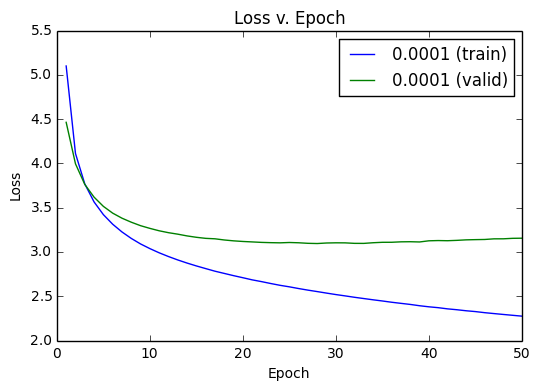

In [3]:
%matplotlib inline
for k in logs.keys():
    plt.plot(logs[k][0], logs[k][1], label=str(k) + ' (train)')
    plt.plot(logs[k][0], logs[k][2], label=str(k) + ' (valid)')
plt.title('Loss v. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Perplexity vs. Epoch

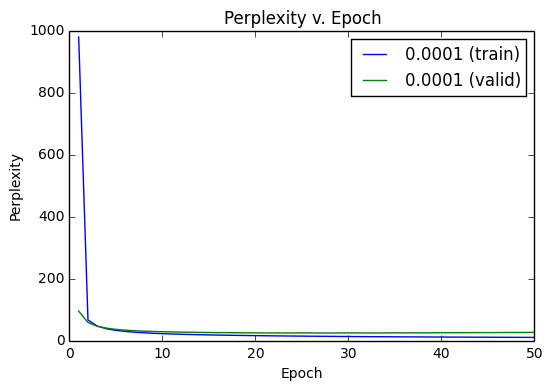

In [4]:
%matplotlib inline
for k in logs.keys():
    plt.plot(logs[k][0], logs[k][3], label=str(k) + ' (train)')
    plt.plot(logs[k][0], logs[k][4], label=str(k) + ' (valid)')
plt.title('Perplexity v. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Perplexity')
plt.legend()
plt.show()

### Generations

In [5]:
def print_sample(sample):
    enc_input = ' '.join([w for w in sample['encoder_input'].split(' ') if w != '<pad>'])
    gold = ' '.join([w for w in sample['gold'].split(' ') if w != '<mask>'])
    print('Input: '+ enc_input + '\n')
    print('Gend: ' + sample['generated'] + '\n')
    print('True: ' + gold + '\n')
    print('\n')
    

In [6]:
for sample in report['train_samples']:
    print_sample(sample)

Input:  caramelized onion and gorgonzola pizza <begin_ingredients> 1 / 8 cup butter <ing> 2 large vidalia onions , thinly sliced <ing> 2 teaspoons sugar <ing> 1 ( 10 ounce ) package refrigerated pizza dough <ing> 1 pound gorgonzola cheese , crumbled <end>

Gend:  <beg> preheat oven to 350 degrees . <step> in a large bowl , combine the flour , sugar , baking powder , salt and pepper . <step> in a separate bowl , whisk together the egg yolks , milk , butter

True:  in a large saute pan , melt butter over medium heat . saute onions in butter until the onions are soft and dark brown , approximately 25 minutes . stir in sugar , and continue cooking for 1 or 2 more minutes . <step> preheat oven to 425 degrees f ( 220 degrees c ) . <step> grease a pizza pan or cookie sheet , and press out the dough to desired thickness . spread onions evenly over the dough , and top with crumbled gorgonzola . <step> bake for 10 to 12 minutes , or until done . <end>



Input:  nicole’s walnut - tarragon chicke

In [7]:
for sample in report['valid_samples']:
    print_sample(sample)

Input:  easy crockpot lasagna <begin_ingredients> 1 pound ground beef or turkey <ing> 1 ( 26 - ounce ) jar pasta sauce ( keep jar ! do n't rinse and throw out ! ) <ing> 1 ( 10 - ounce ) box of regular lasagna noodles ( i use brown rice noodles ) <ing> 1 ( 16 - ounce ) container ricotta cheese <ing> 8 ounces sliced mozzarella cheese <ing> 4 cups shredded italian - blend cheese <ing> 1 / 4 cup water <end>

Gend:  <beg> preheat oven to 350 degrees . <step> in a large bowl , combine the flour , sugar , baking powder , salt and pepper . <step> in a separate bowl , whisk together the egg yolks , milk , butter

True:  brown meat with chosen spices in large skillet <step> pour in entire jar of pasta sauce ( save jar , do n't rinse or throw away ! ) <step> simmer on low for a few minutes <step> put a ladle - full of sauce mixture into the bottom of your crockpot . <step> top with a layer of dried lasagna noodles . you 'll have to break them to fit . <step> smear ricotta cheese on top of lasagna

In [8]:
for sample in report['test_samples']:
    print_sample(sample)

Input:  healthy sweet and sour chicken <begin_ingredients> 3 - 4 boneless skinless chicken breasts , pounded to ½ inch thickness and chopped into 1 inch pieces <ing> ⅓ cup corn starch <ing> 2 tablespoons oil <ing> 1 red bell pepper , chopped <ing> 1 green bell pepper <ing> ½ white or yellow onion , chopped <ing> ¾ cup sugar <ing> ½ cup apple cider vinegar ( may sub white vinegar ) <ing> 2 tablespoons soy sauce <ing> 1 teaspoon garlic powder <ing> ½ teaspoon onion * salt <ing> ¼ cup ketchup <ing> 1 tablespoon cornstarch + 2 tablespoon cold water <ing> 1 tablespoon cornstarch + 2 tablespoon cold water <end>

Gend:  <beg> preheat oven to 350 degrees . <step> in a large bowl , combine the flour , sugar , baking powder , salt and pepper . <step> in a separate bowl , whisk together the egg yolks , milk , butter

True:  first prepare the sauce . add sugar , vinegar , soy sauce , garlic powder , onion salt , and ketchup to a medium sauce pan . stir and bring to a boil . in a small bowl whisk t

### BLEU Analysis

In [9]:
print 'Overall Score: ', report['bleu']['score'], '\n'
print '1-gram Score: ', report['bleu']['components']['1']
print '2-gram Score: ', report['bleu']['components']['2']
print '3-gram Score: ', report['bleu']['components']['3']
print '4-gram Score: ', report['bleu']['components']['4']

Overall Score:  0.02 

1-gram Score:  46.3
2-gram Score:  13.1
3-gram Score:  4.7
4-gram Score:  2
